## **DATA PREPARATION**

In [ ]:
import pandas as pd # To work with dataframes

### Load data

In [ ]:
demoDetails    =  pd.read_csv("/content/drive/MyDrive/Swayam_plus Videos/Data Preparation/demoDetails.csv"   , index_col=0)
acDetails      =  pd.read_csv("/content/drive/MyDrive/Swayam_plus Videos/Data Preparation/acDetails.txt"     , sep="\t")
serviceDetails =  pd.read_csv("/content/drive/MyDrive/Swayam_plus Videos/Data Preparation/serviceDetails.csv", index_col=0)

By setting 'index_col = 0', 1st column will be the index column


### Data Wrangling

 - We are interested in merging acDetails, demoDetails and serviceDetails
 - Before merging we need to make necessary checks !
 - What are the mandatory checks you should look for before merging ?
 -   1. Are there any duplicate records?
     2. Whether the customer ID is common across all the files ?

In [ ]:
# 1. Are there any duplicate records?
print(len(demoDetails))
len(demoDetails['customerID'].unique())

In [ ]:
print(len(acDetails))
len(acDetails['customerID'].unique())

In [ ]:
print(len(serviceDetails))
len(serviceDetails['customerID'].unique())

Yes, there is one duplicate record across all the three dataframes

In [ ]:
# To determine the duplicate records 'duplicated()' can be used

demoDetails.duplicated(subset=['customerID'], keep=False)
# duplicated function returns a Boolean Series with True value
# for each duplicated row


In [ ]:
# So now let's subset the rows and look at the duplications

demoDetails[demoDetails.duplicated(['customerID'],keep=False)]



In [ ]:
acDetails[acDetails.duplicated(['customerID'],keep=False)]

In [ ]:
serviceDetails[serviceDetails.duplicated(['customerID'],keep=False)]

In [ ]:
# ====================== Removing duplicate records ================================

demoDetails    =  demoDetails.drop_duplicates()

acDetails      =  acDetails.drop_duplicates()

serviceDetails =  serviceDetails.drop_duplicates()



First occurrence of the duplicate row is kept and
subsequent occurrence have been removed

**2. Whether the customer ID is common across all the files ?**

syntax: dataframe1.equals(dataframe2)

In [ ]:
acDetails.customerID.equals(demoDetails.customerID)


In [ ]:
serviceDetails.customerID.equals (demoDetails.customerID)


In [ ]:
acDetails.customerID.equals (serviceDetails.customerID)

Looks like they are indeed identical!

Joining three dataframes:

Syntax: pd.merge(df1, df2, on=['Column_Name'], how='inner')

In [ ]:
churn  =  pd.merge(demoDetails, acDetails, on = "customerID")
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:

churn  =  pd.merge(churn,serviceDetails,   on = "customerID")
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [ ]:
churn1 =  churn.copy()

### Data Exploration

In [ ]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        250 non-null    object 
 1   gender            250 non-null    object 
 2   SeniorCitizen     245 non-null    float64
 3   Partner           250 non-null    object 
 4   Dependents        250 non-null    object 
 5   tenure            250 non-null    object 
 6   Contract          250 non-null    object 
 7   PaperlessBilling  250 non-null    object 
 8   PaymentMethod     250 non-null    object 
 9   MonthlyCharges    240 non-null    float64
 10  TotalCharges      235 non-null    float64
 11  PhoneService      250 non-null    object 
 12  MultipleLines     250 non-null    object 
 13  InternetService   250 non-null    object 
 14  OnlineSecurity    250 non-null    object 
 15  OnlineBackup      250 non-null    object 
 16  DeviceProtection  250 non-null    object 
 1

Points to note:

- tenure' has been read as object instead of integer

- 'SeniorCitizen' has been read as float64 instead of object

- Missing values present in few variables


In [ ]:
# Get unique values and counts using pandas
churn1['tenure'].value_counts()

,count
tenure,
One,20
72,15
2,9
Four,9
9,8
...,...
992,1
40,1
969,1


'tenure' has been read as object instead of integer
because of values One/Four which are strings

In [ ]:
churn1['SeniorCitizen'].unique()

array([ 0.,  1., nan])


'SeniorCitizen' has been read as float64 instead of int64 since it has values nan values

Checking frequencies of each categories in a variable

In [ ]:
categotical_data = churn1.select_dtypes(include=['object']).copy()

categotical_data.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

In [ ]:
# categotical_data.value_counts() AttributeError:

categotical_data = categotical_data.drop(['customerID','tenure'],axis = 1)

frequencies      = categotical_data.apply(lambda x: x.value_counts()).T.stack()

print(frequencies)

gender            Female                       124.0
                  Male                         126.0
Partner           No                           126.0
                  Yes                          124.0
Dependents        1@#                            6.0
                  No                           171.0
                  Yes                           73.0
Contract          Month-to-month               133.0
                  One year                      55.0
                  Two year                      62.0
PaperlessBilling  No                            98.0
                  Yes                          152.0
PaymentMethod     Bank transfer (automatic)     58.0
                  Credit card (automatic)       57.0
                  Electronic check              80.0
                  Mailed check                  55.0
PhoneService      No                            27.0
                  Yes                          223.0
MultipleLines     No                          

Points to note:
- 'Dependents' should have only 2 levels (Yes/No) but it has 3 due
-  the special character '1@#' that has been read as another level


In [ ]:
# Summary of numerical variables

summary = churn1.describe()

print(summary)

       SeniorCitizen  MonthlyCharges  TotalCharges
count     245.000000      240.000000    235.000000
mean        0.138776       63.694792   2307.926809
std         0.346420       30.730847   2292.524824
min         0.000000        3.500000     18.850000
25%         0.000000       33.937500    447.250000
50%         0.000000       70.925000   1337.500000
75%         0.000000       89.150000   3883.775000
max         1.000000      115.100000   8337.450000


In [ ]:
# Cleaning column 'tenure'

# Replacing 'Four' by 4 and 'One' by 1 in 'tenure'

churn1['tenure'] = churn1.tenure.replace("Four", 4)

churn1['tenure'] = churn1.tenure.replace("One", 1)

churn1['tenure'] = churn1.tenure.astype(int)

print(churn1['tenure'])

0       1
1      39
2       2
3       6
4       4
       ..
245     4
246    56
247     1
248    42
249     1
Name: tenure, Length: 250, dtype: int64


Cleaning column 'Dependents'

'Dependents' should have only 2 levels (Yes/No) but it has 3 due
     the special character '1@#' that has been read as another level
     

In [ ]:
# Gives counts- class 'No' has the max count

pd.crosstab(index=churn1['Dependents'], columns="count")

col_0,count
Dependents,
1@#,6
No,171
Yes,73


In [ ]:
# Replacing "1@#" with 'No'

churn1['Dependents'] = churn1['Dependents'].replace("1@#", 'No')

# Verifying if the special characters were converted to desired class

table_dependents  = pd.crosstab(index = churn1['Dependents'], columns="count")

print(table_dependents)

col_0       count
Dependents       
No            177
Yes            73


- Checking for logical fallacies in the data
- Approaches to resolve the logical fallacies in the data
- Outlier detection using boxplot
- Approaches to fill in missing values  

In [ ]:
# 1. Checking if the 'customerID' is consistent
churn1['customerID']

,customerID
0,8260-NGFNY
1,2359-QWQUL
2,6598/RFFVI
3,IXSTS-8780
4,2674/MIAHT
...,...
245,8111-RKSPX
246,6922-NCEDI
247,5192-EBGOV
248,8495-PRWFH


I  Interms of total number of characters

II Sequence of charaters i.e. first 4 characters of customerID should be
    numbers followed by hyphen and 5 upper case letters
    

In [ ]:
# I
# to get the index of customerID whose length != 10
len_ind = [i for i,value in enumerate(churn1.customerID) if len(value)!=10]
len_ind

[]

In [ ]:

import re
pattern = '^[0-9]{4,4}-[A-Z]{5,5}'

p = re.compile(pattern)
type(p)

q = [i for i,value in enumerate(churn1.customerID) if p.match(str(value))==None]
print(q)


[2, 3, 4, 6]


In [ ]:

fp1 = re.compile('^[A-Z]{5,5}-[0-9]{4,4}')
fp2 = re.compile('^[0-9]{4,4}/[A-Z]{5,5}')

for i in q:
    false_str = str(churn1.customerID[i])
    if(fp1.match(false_str)):
        str_splits=false_str.split('-')
        churn1.customerID[i]=str_splits[1]+'-'+str_splits[0]
    elif(fp2.match(false_str)):
        churn1.customerID[i]=false_str.replace('/','-')


/tmp/ipython-input-534760473.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.customerID[i]=false_str.replace('/','-')
/tmp/ipython-input-534760473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.customerID[i]=str_splits[1]+'-'+str_splits[0]
/tmp/ipython-input-534760473.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1.customerID[i]=false_str.replace('/','-')
/tmp/ipython-input-534760473.py:10: SettingWi

Logical checks - check for fallacies in the data

If Internet service = No, then all the allied services related to internet
should be no.
        
Is that the case?

In [ ]:
# Subsetting Internet Service and allied services
y = churn1[(churn1.InternetService =='No')]
z = y.iloc[:,13:20]

In [ ]:
z

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
8,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
13,No,Yes,Yes,No internet service,No internet service,Yes,No internet service
14,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
15,No,Yes,Yes,No internet service,No internet service,Yes,No internet service
18,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
20,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
23,No,Yes,Yes,No internet service,No internet service,Yes,No internet service
24,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
31,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


   Some observations have InterService= No and Yes in certain allied services
   This is a logical fallacy!

   **Two ways of approach:**
   
   => Brute force method- wherever InternetService = No, blindly make other
      related fields 'No'
   
   => Logical approach- If there are say 2 or more Yes in the allied services,
      then go back and change InternetService= Yes
      

In [ ]:
# Logical approach

for i,row in z.iterrows():
    yes_cnt=row.str.count('Yes').sum()
    if(yes_cnt>=2):
        z.loc[i].InternetService='Yes'
    else:
        z.loc[i,:]='No internet service'

In [ ]:
z

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
8,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
13,Yes,Yes,Yes,No internet service,No internet service,Yes,No internet service
14,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
15,Yes,Yes,Yes,No internet service,No internet service,Yes,No internet service
18,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
20,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
23,Yes,Yes,Yes,No internet service,No internet service,Yes,No internet service
24,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
31,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


OUTLIER DETECTION

In [ ]:
## looking for any outliers
churn1.tenure.describe()

,tenure
count,250.000000
mean,55.944000
std,147.819781
min,1.000000
25%,8.250000
50%,30.500000
75%,60.500000
max,1008.000000


<Axes: ylabel='tenure'>

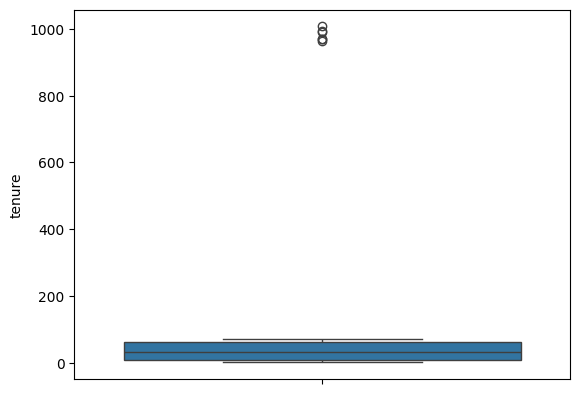

In [ ]:
# Outlier detection using boxplot
import seaborn as sns
sns.boxplot(y = churn1['tenure'])

In [ ]:

median_tenure = churn1['tenure'].median()
churn1.loc[churn1['tenure'] >= 500, 'tenure'] = median_tenure

/tmp/ipython-input-1901613930.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  churn1.loc[churn1['tenure'] >= 500, 'tenure'] = median_tenure


In [ ]:

# Checking the summary of the column 'tenure’ after median imputation
churn1['tenure'].describe()


,tenure
count,250.000000
mean,33.084000
std,25.024946
min,1.000000
25%,8.250000
50%,30.250000
75%,57.750000
max,72.000000


<Axes: ylabel='tenure'>

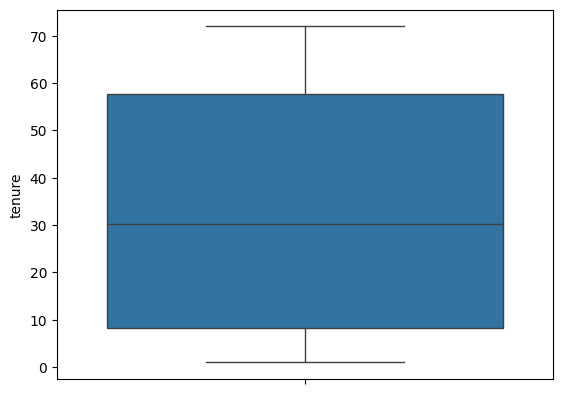

In [ ]:
sns.boxplot(y = churn1['tenure'])

In [ ]:
# To check the count of missing values present in each column
churn1.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,5
Partner,0
Dependents,0
tenure,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
MonthlyCharges,10


Missing values in SeniorCitizen, MonthlyCharges, TotalCharges


Imputing missing values

Two ways of approach

	 - Fill the missing values by mean / median, in case of numerical variable
	 - Fill the missing values with the class which has maximum count, in case of
       categorical variable

Mode imputation - SeniorCitizen

In [ ]:
churn1['SeniorCitizen'].fillna(churn1['SeniorCitizen'].mode()[0], inplace = True)

churn1.SeniorCitizen.isnull().sum()

/tmp/ipython-input-2043860292.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn1['SeniorCitizen'].fillna(churn1['SeniorCitizen'].mode()[0], inplace = True)


np.int64(0)

Look at the description to know whether numerical variables should be
imputed with mean or median

    DataFrame.describe() - generates descriptive statistics that summarize the
    central tendency, dispersion and shape of a dataset’s distribution,
    excluding NaN values

In [ ]:
churn1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,250.000000,250.000000,240.000000,235.000000
mean,0.136000,33.084000,63.694792,2307.926809
std,0.343476,25.024946,30.730847,2292.524824
min,0.000000,1.000000,3.500000,18.850000
25%,0.000000,8.250000,33.937500,447.250000
50%,0.000000,30.250000,70.925000,1337.500000
75%,0.000000,57.750000,89.150000,3883.775000
max,1.000000,72.000000,115.100000,8337.450000


Mean imputation - TotalCharges

In [ ]:
churn1['TotalCharges'].mean()

np.float64(2307.926808510638)

<Axes: xlabel='TotalCharges', ylabel='Churn'>

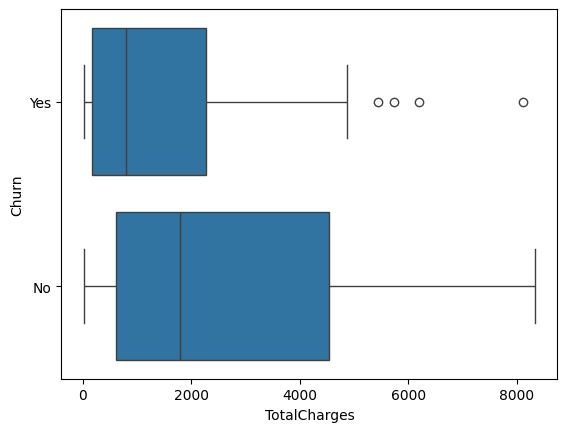

In [ ]:
sns.boxplot(x = churn1['TotalCharges'], y = churn1['Churn'])

Let us impute those missing values using mean based on the output
variable 'Churn' – Yes & No


In [ ]:
churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        250 non-null    object 
 1   gender            250 non-null    object 
 2   SeniorCitizen     250 non-null    float64
 3   Partner           250 non-null    object 
 4   Dependents        250 non-null    object 
 5   tenure            250 non-null    float64
 6   Contract          250 non-null    object 
 7   PaperlessBilling  250 non-null    object 
 8   PaymentMethod     250 non-null    object 
 9   MonthlyCharges    240 non-null    float64
 10  TotalCharges      235 non-null    float64
 11  PhoneService      250 non-null    object 
 12  MultipleLines     250 non-null    object 
 13  InternetService   250 non-null    object 
 14  OnlineSecurity    250 non-null    object 
 15  OnlineBackup      250 non-null    object 
 16  DeviceProtection  250 non-null    object 
 1

In [ ]:
churn1['Churn']

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,No
...,...
245,Yes
246,No
247,Yes
248,No


In [ ]:
churn1['TotalCharges'] = churn1.groupby('Churn')['TotalCharges']\
.transform(lambda x: x.fillna(x.mean()))

churn1.TotalCharges.isnull().sum()

np.int64(0)

Mean imputation - MonthlyCharges

In [ ]:
churn1['MonthlyCharges'].mean()

np.float64(63.69479166666667)

<Axes: xlabel='MonthlyCharges', ylabel='Churn'>

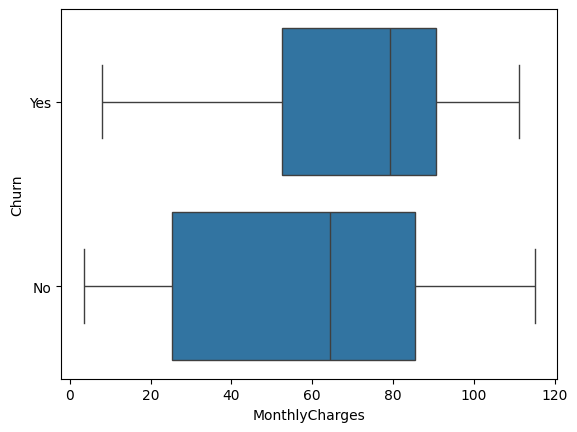

In [ ]:
sns.boxplot(x = churn1['MonthlyCharges'], y = churn1['Churn'])

Let us impute those missing values using mean based on the output
varieble 'Churn' – Yes & No


In [ ]:
churn1['MonthlyCharges'] = churn1.groupby('Churn')['MonthlyCharges']\
.transform(lambda x: x.fillna(x.mean()))

churn1.MonthlyCharges.isnull().sum()

np.int64(0)

### SAMPLING

RANDOM SAMPLING -  WITHOUT REPLACEMENT

In [ ]:
import random

p1 = list(range(1, 20))
print(p1)

In [ ]:
SRSWOR = random.sample(population = p1, k = 7)
print(SRSWOR)

In [ ]:
SRSWOR = random.sample(population = p1, k = 30)
print(SRSWOR)

If the sample size i.e. k is larger than the popultaion p1, ValueError is raised.


 RANDOM SAMPLING -  WITH REPLACEMENT

In [ ]:
p2 = list(range(1, 25))
print(p2)


In [ ]:
SRSWR = random.choices(population = p2, k = 10)
print(SRSWR)

**MODULE OUTCOMES**

1. Importing from different formats                                          
2. Joins in python                                                           
3. Basic descriptive analysis of data - to check the data type               
4. Convert to valid data types                                               
5. Consistency checks, unique values and regular expression patterns         
6. Logical checks for outliers                                               
7. Filling missing data- avg of all data, avg of data in categories, apply lambda                                                               
8. Outlier detection  
9. Sampling (with/without replacement)   